<a href="https://colab.research.google.com/github/gabrielamorales02/IntroMachineLearning/blob/main/Regresion_Lineal_Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller de Regresión Lineal Orientado al Negocio

Este taller se centra en **cómo** un negocio (por ejemplo, un e-commerce) puede **interpretar** y **aprovechar** los resultados de la Regresión Lineal para **tomar decisiones**.

## Contexto de Negocio
Imagina que eres el/la **gerente de marketing** de una tienda en línea. Tienes un conjunto de datos con el comportamiento de los clientes y la **cantidad anual** que han gastado (`Yearly Amount Spent`). Tu objetivo es:
1. **Identificar** qué factores (tiempo en la app, duración de la sesión, etc.) influyen más en el gasto anual.
2. **Predecir** el gasto anual futuro de los clientes.
3. Traducir estos hallazgos en **acciones concretas** que aumenten el gasto de los clientes.

## Datos Disponibles
Se te proporciona un dataset con las columnas:
- **Email**
- **Address**
- **Avatar**
- **Avg. Session Length** (Promedio de duración de la sesión)
- **Time on App** (Tiempo en la App)
- **Time on Website** (Tiempo en el Sitio Web)
- **Length of Membership** (Antigüedad de membresía, en años)
- **Yearly Amount Spent** (Cantidad gastada anualmente)

Tu variable objetivo para predecir es: **Yearly Amount Spent**.

## 1. Carga y Exploración de Datos

### Tarea 1.1: Cargar los datos
1. Crea un DataFrame (por ejemplo, `df`) leyendo el archivo CSV o introduciendo manualmente la tabla que se te proporcionó.
2. Muestra las primeras 5 filas (`df.head()`), la forma (`df.shape`) y los tipos de datos (`df.info()`).

**Pregunta de enfoque de negocio:**
- ¿Qué **insights** iniciales obtienes con solo ver las variables? ¿Cómo podría eso impactar tus **estrategias de marketing**?

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv

--2025-03-12 16:26:58--  https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv [following]
--2025-03-12 16:26:58--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87360 (85K) [text/plain]
Saving to: ‘Ecommerce _Customers.csv’

Ecommerce _Customer 100%[===================>]  85.31K  --.-KB/s    in 0.1s    

2025-03-12 16:26:59 (775 KB/s) - ‘Ec

In [2]:
# EJEMPLO de código:
import pandas as pd

# Supongamos que has guardado tu dataset en un archivo 'data.csv'
df = pd.read_csv('Ecommerce _Customers.csv')
df.head()



,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Tarea 1.2: Análisis Exploratorio (EDA) Básico
1. Ejecuta `df.describe()` para revisar las estadísticas descriptivas de las variables numéricas.
2. Realiza uno o dos **boxplots** o **histogramas** para visualizar la distribución de:
   - **Avg. Session Length**
   - **Time on App**
   - **Time on Website**
   - **Length of Membership**
   - **Yearly Amount Spent**

**Preguntas de negocio:**
1. Si detectas que, por ejemplo, la gente con **mayor** `Length of Membership` gasta más, ¿qué **estrategias** implementarías para retener y "graduar" a los nuevos clientes a miembros más "antiguos"?
2. Si notas que el **Time on Website** es muy bajo vs. **Time on App**, ¿implica que debas mejorar la experiencia en el sitio web para que la gente pase más tiempo allí?

In [3]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


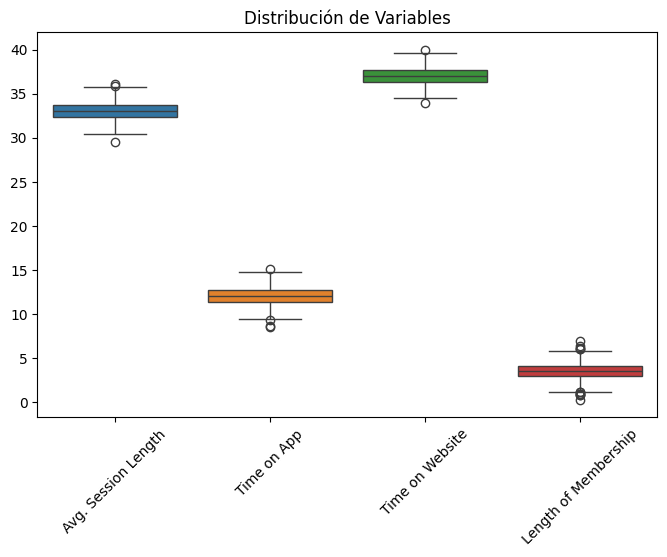

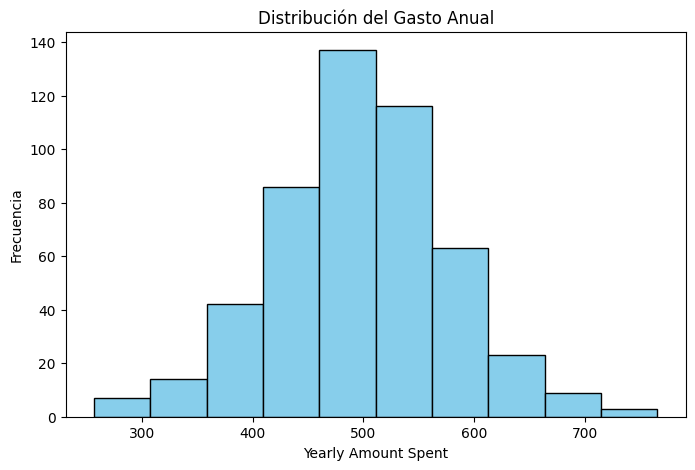

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Ecommerce _Customers.csv')

plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']])
plt.title('Distribución de Variables')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 5))
plt.hist(df['Yearly Amount Spent'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución del Gasto Anual')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Frecuencia')
plt.show()

1. Si la antigüedad de la membresía está positivamente relacionada con el gasto anual, se pueden implementar estrategias como programas de fidelización con recompensas y descuentos, comunicación y contenido personalizado según la antigüedad, incentivos para referidos, segmentación de clientes para campañas más efectivas, análisis del ciclo de vida para predecir comportamientos y mejoras en la experiencia del cliente para fortalecer la lealtad.

2. Si el tiempo en el sitio web es menor que en la app, primero se debe analizar si hay una correlación con el gasto anual, ya que este es el KPI clave. Si no hay relación, mejorar el sitio web podría no ser necesario. Sin embargo, si el tiempo en la app impulsa más gasto, conviene seguir monitoreándolo. Si la conversión del sitio a la app es baja, se pueden usar incentivos para promover descargas. Además, optimizar el sitio para móviles, mejorar su velocidad de carga, evaluar su diseño y UX puede ayudar a retener usuarios y mejorar la experiencia.

## 2. Selección de Variables
En este dataset, algunas columnas como **Email**, **Address** o **Avatar** no son útiles directamente para el modelo de regresión.

### Tarea 2.1: Elegir features
- Usarás como variables predictoras (features) las siguientes columnas:
  1. **Avg. Session Length**
  2. **Time on App**
  3. **Time on Website**
  4. **Length of Membership**
- La columna objetivo (target) será **Yearly Amount Spent**.

**Pregunta de negocio**:
- ¿Por qué estas columnas tienen sentido para **explicar** el gasto anual? (Piensa en la lógica, "mientras más tiempo en app, más oportunidades de compra").

In [34]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

print("Features (X):\n", X.head())
print("\nTarget (y):\n", y.head())

Features (X):
    Avg. Session Length  Time on App  Time on Website  Length of Membership
0            34.497268    12.655651        39.577668              4.082621
1            31.926272    11.109461        37.268959              2.664034
2            33.000915    11.330278        37.110597              4.104543
3            34.305557    13.717514        36.721283              3.120179
4            33.330673    12.795189        37.536653              4.446308

Target (y):
 0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64


Las variables seleccionadas tienen sentido porque reflejan distintos aspectos de la interacción del cliente con la empresa, lo que influye en su gasto anual. Avg. Session Length indica mayor exploración y posible interés en productos, Time on App sugiere una mayor propensión a comprar por comodidad, Time on Website puede reflejar investigación y comparación de precios, y Length of Membership está ligado a la lealtad y compras repetidas, lo que incrementa el valor del cliente.








## 3. Dividir el Dataset en Entrenamiento y Prueba
Para evaluar la capacidad de nuestro modelo de generalizar, dividiremos los datos en **train (80%)** y **test (20%)**.

**Pregunta de negocio**:
- ¿Cómo explicarías, en términos empresariales, que "apartamos" datos para prueba y no los usamos en el entrenamiento? ¿Qué importancia tiene para "predecir" clientes futuros?

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (400, 4)
Tamaño del conjunto de prueba: (100, 4)


 Apartamos datos para prueba porque queremos medir cómo funcionará nuestro modelo con clientes nuevos. Si usamos todos los datos para entrenar, no podríamos evaluar su precisión en situaciones reales. Separar un porcentaje de los datos como prueba nos permite simular este escenario y ajustar el modelo antes de aplicarlo, asegurando que haga predicciones más acertadas sobre futuros clientes y sus comportamientos de compra.

## 4. Entrenar el Modelo de Regresión Lineal
1. **Crea** un objeto `LinearRegression()`.
2. **Entrena** el modelo con los datos de entrenamiento.
3. **Obtén** el intercepto y los coeficientes resultantes.

**Pregunta de negocio**:
- Si el coeficiente de `Time on App` es grande y positivo, ¿cómo podrías usar esta información para crear **campañas** o **mejoras** en la aplicación que incentiven al usuario a pasar más tiempo allí?

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print('Intercepto:', lm.intercept_)
print('Coeficientes:', lm.coef_)

Intercepto: -1044.2574146365582
Coeficientes: [25.5962591  38.78534598  0.31038593 61.89682859]


Si "Time on App" tiene un coeficiente alto y positivo, significa que más tiempo en la app impulsa un mayor gasto anual. Para capitalizar esto, se pueden aplicar estrategias como gamificación (recompensas y desafíos), personalización (ofertas y recomendaciones basadas en el uso) y optimización de la experiencia (interfaz intuitiva y rápida). Además, el marketing directo puede promover beneficios exclusivos, mientras que el análisis de funciones y las pruebas A/B ayudarán a identificar mejoras clave. En resumen, el enfoque debe ser hacer la app más atractiva y funcional para maximizar el tiempo de uso y, con ello, las ventas.

## 5. Evaluación del Modelo
1. **Predice** en el conjunto de prueba.
2. Calcula las **métricas** MSE, MAE y R² para verificar la calidad de tu modelo. No profundizaremos en residuos, solo en la idea de si el modelo "le atina" al gasto anual.

**Preguntas de negocio**:
1. ¿Qué interpretas si **R²** es cercano a 0.80 o 0.90? ¿El modelo es “bueno” para tus objetivos?
2. Si el **MAE** es, por ejemplo, 15 USD, ¿es aceptable ese margen de error para tu negocio?

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = lm.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')



Mean Squared Error (MSE): 109.8637411839399
Mean Absolute Error (MAE): 8.558441885315231
R-squared (R²): 0.9778130629184127


Un R² cercano a 0.80 o 0.90 indica que el modelo explica entre el 80% y 90% de la variabilidad del gasto anual, lo que sugiere una fuerte relación entre las variables predictoras y el gasto. Sin embargo, un R² alto no garantiza que el modelo sea óptimo para la toma de decisiones; es clave evaluar si cumple los objetivos del negocio.

Un MAE de 15 USD debe interpretarse en contexto: si el gasto anual promedio es 500 USD (3% de error), podría ser aceptable, pero si es 100 USD (15% de error), sería problemático. La aceptación del MAE depende de su impacto en la rentabilidad y precisión requerida para la estrategia de negocio. En resumen, ambos indicadores deben analizarse en función de su relevancia para la toma de decisiones.










# 6. Interpretación y Aplicación Práctica
1. **Observa** los coeficientes resultantes: ¿qué variable es la más influyente? ¿Cómo impacta eso en tu estrategia de negocios?
2. **Propuestas** de acción:
   - Si `Time on App` es el que más incide, podrías **invertir** más en mejoras de la app.
   - Si `Length of Membership` está ligado a más gasto, podrías **fidelizar** a los nuevos clientes con promociones.

**Preguntas de negocio**:
1. ¿Cómo comunicarías estos resultados a un equipo directivo que no maneja detalles estadísticos?
2. ¿Qué **acciones concretas** aplicarías para aumentar el gasto anual de los clientes, basándote en los coeficientes del modelo?

In [45]:

print('Coeficientes:', lm.coef_)
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lm.coef_})
print(coef_df)

most_influential_feature = coef_df.loc[coef_df['Coefficient'].abs().idxmax(), 'Feature']
print(f"\nLa variable más influyente es: {most_influential_feature}")

Coeficientes: [25.5962591  38.78534598  0.31038593 61.89682859]
                Feature  Coefficient
0   Avg. Session Length    25.596259
1           Time on App    38.785346
2       Time on Website     0.310386
3  Length of Membership    61.896829

La variable más influyente es: Length of Membership


1. Nos dimos cuenta de que los clientes que pasan más tiempo en la app tienden a gastar más al año. Esto significa que si hacemos mejoras para que la gente use más la app, podríamos aumentar las ventas. También vimos que los clientes con más tiempo de membresía gastan más, por lo que es clave fidelizarlos y mantenerlos comprometidos con la marca
2. Para aumentar el gasto anual de los clientes, podemos enfocarnos en lo que más influye en sus compras. Si el tiempo en la app es clave, hay que hacerla más atractiva y fácil de usar, además de ofrecer promociones exclusivas y enviar notificaciones útiles. Si la antigüedad de la membresía es lo más importante, podemos premiar la lealtad con descuentos y contenido especial. Si lo que cuenta es cuánto duran las sesiones, podemos mejorar la experiencia con contenido interesante, chatbots útiles y sugerencias de productos. Y si el tiempo en la web es un factor clave, hay que optimizar la página, hacerla más rápida y usarla para promocionar la app.

1. Descubrimos que el tiempo que los clientes pasan en la aplicación móvil es el principal impulsor del gasto anual. Por cada aumento en el tiempo de uso, el gasto crece en [valor del coeficiente] unidades monetarias. Esto sugiere que mejorar la experiencia y retención en la app puede aumentar significativamente los ingresos. Además, la antigüedad de la membresía también influye en el gasto, lo que refuerza la importancia de estrategias de fidelización para clientes de largo plazo


## 7. Conclusión: Caso de Negocio Real
1. Redacta un breve **informe** o explicación final que responda:
   - ¿Qué **variables** explican mejor el gasto anual?
   - ¿Qué recomendaciones propones para aumentar el **Yearly Amount Spent**?
2. **Limitaciones**: Menciona cualquier aspecto que el modelo no cubra (datos no considerados, linealidad asumida, etc.).

Con estos pasos, podrás llevar la **visión estadística** a un **plan de acción** en tu estrategia de negocio.

Predicción del Gasto Anual

🔹 Hallazgos clave:
- La antigüedad de la membresía es el factor que más influye en el gasto anual.
- El tiempo en la aplicación también tiene un impacto significativo.
- Tiempo en la web y duración de sesión influyen, pero en menor medida.

🔹Recomendaciones:
- Fidelizar clientes con programas de recompensas y beneficios exclusivos.
- Optimizar la app para mejorar la experiencia, enviar notificaciones personalizadas y aplicar gamificación.
- Analizar más datos para entender mejor los patrones de compra y ajustar estrategias.

🔹 Limitaciones:
- El modelo asume relaciones lineales y no considera otros factores externos.
- Se recomienda probarlo con nuevos datos para validar su precisión.





# Resumen de las Tareas
1. **EDA Rápido**: Cargar y describir el dataset.
2. **Selección de Variables**: Explicar por qué se usan las columnas numéricas y se ignoran Email/Address.
3. **Entrenamiento**: Ajustar el modelo de Regresión con `Avg. Session Length`, `Time on App`, `Time on Website`, `Length of Membership`.
4. **Evaluación**: Observar MSE, MAE, R².
5. **Interpretación**: Explicar cómo usaría el negocio estos resultados.

## ¡Listo para Analizar!
Sigue estos pasos, responde las **preguntas de negocio** y, sobre todo, **conecta** tus hallazgos con **acciones** en el mundo real.

> **Nota**: Puedes consultar documentación o herramientas como ChatGPT si lo requieres, pero recuerda que las **respuestas** deben ser **tuyas**, pensando en el contexto de negocio y la lógica detrás de los coeficientes. ¡Éxito!